In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [103]:
df.Age = df.Age.fillna(df.Age.mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [104]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [105]:
df.Embarked = df.Embarked.fillna('S')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [107]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [108]:
df.Sex = df.Sex.apply(lambda x: 1 if x == 'male' else 0)

df.Sex.value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [109]:
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [110]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [111]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Survived == 0]
df_minority = df[df.Survived == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df.Survived.value_counts()


Survived
0    342
1    342
Name: count, dtype: int64

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
764,0,3,1,0.195778,0,0,0.015176,0,0,1
733,0,2,1,0.283740,0,0,0.025374,0,0,1
696,0,3,1,0.547625,0,0,0.015713,0,0,1
503,0,3,0,0.459663,0,0,0.018714,0,0,1
734,0,2,1,0.283740,0,0,0.025374,0,0,1


In [148]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       112
           1       0.78      0.79      0.78        94

    accuracy                           0.80       206
   macro avg       0.80      0.80      0.80       206
weighted avg       0.80      0.80      0.80       206



In [149]:
y_pred_train = model.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       230
           1       0.88      0.85      0.87       248

    accuracy                           0.87       478
   macro avg       0.87      0.87      0.87       478
weighted avg       0.87      0.87      0.87       478



In [150]:
print(model.score(X_test, y_test))

0.8009708737864077


In [153]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

grid = GridSearchCV(model, param_grid, cv=5, verbose=3)

grid.fit(X_train, y_train)

print(grid.best_params_)

print(grid.best_score_)

y_pred = grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.802 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.708 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.832 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.760 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.823 total time=   0.4s
[CV 3/

In [155]:
est = grid.best_estimator_

print(est.score(X_test, y_test))
print(est.score(X_train, y_train))

0.8106796116504854
0.8744769874476988


In [134]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=4, random_state=42)

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       112
           1       0.71      0.80      0.75        94

    accuracy                           0.76       206
   macro avg       0.76      0.76      0.76       206
weighted avg       0.76      0.76      0.76       206



In [135]:
y_pred_train = model2.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       230
           1       0.83      0.86      0.84       248

    accuracy                           0.83       478
   macro avg       0.83      0.83      0.83       478
weighted avg       0.83      0.83      0.83       478



In [136]:
model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

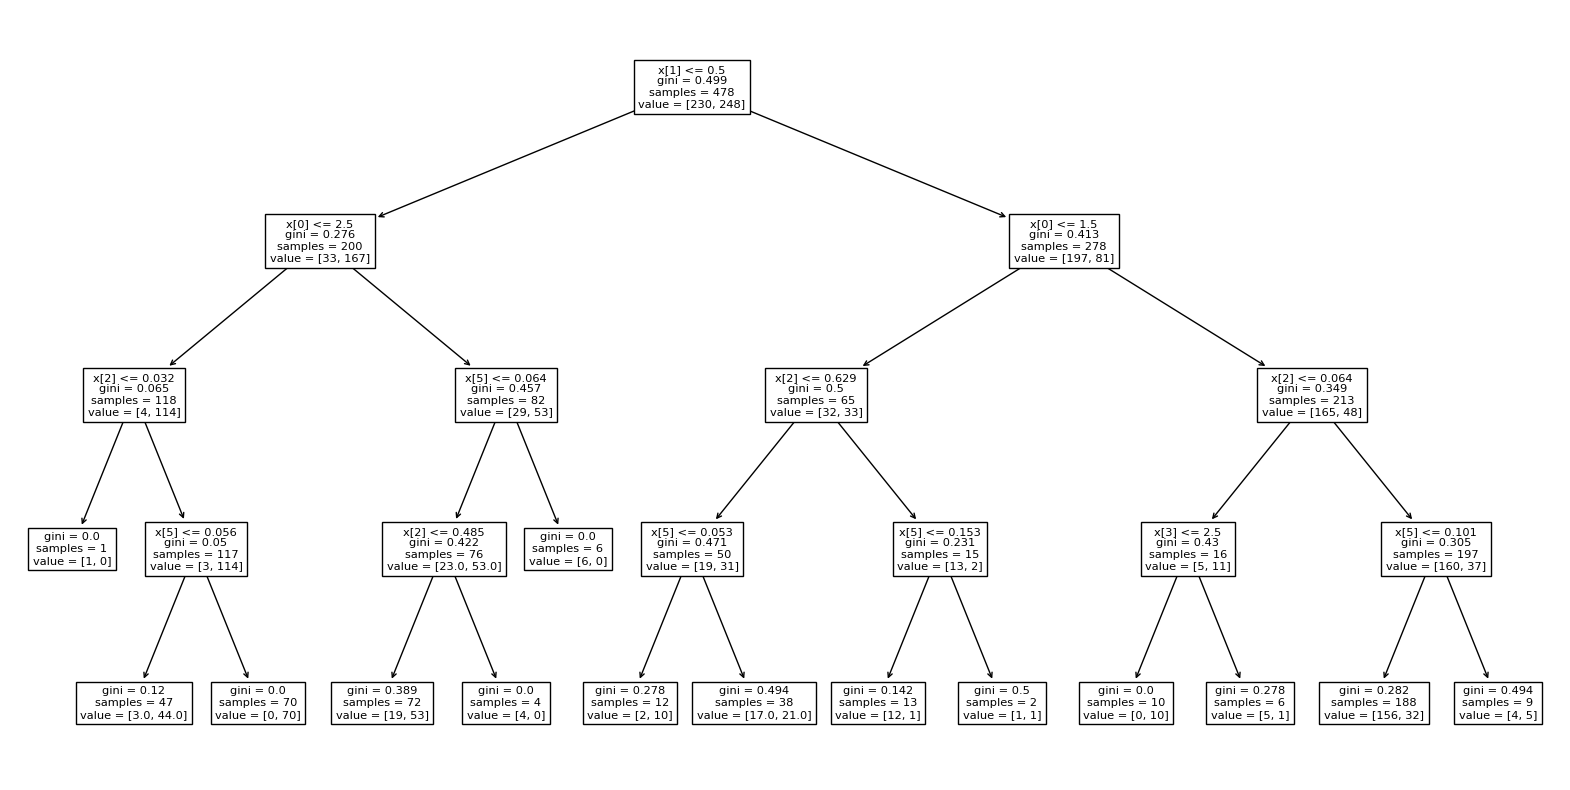

In [137]:
from sklearn import tree


plt.figure(figsize=(20,10))
tree.plot_tree(model2)
plt.show()